# Approach 1: LeNet 
![LeNet Architecture](./lenet.png)
Source: Yan LeCun

### Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, the data is padded with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

In [3]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


### Visualize Data

View a sample from the dataset.

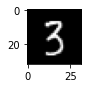

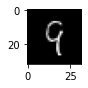

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index1 = random.randint(0, len(X_train))
image1 = X_train[index1].squeeze()

index2 = random.randint(0, len(X_train))
image2 = X_train[index2].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image1, cmap="gray")
plt.figure(figsize=(1,1))
plt.imshow(image2, cmap="gray")

### Preprocess Data

Shuffle the training data.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` and `learning rate` values affect the training speed, model accuracy and rate of learning.

In [6]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 100
rate = 0.001

### LENET-5 architecture

In [50]:
import tensorflow as tf
import time

lenet_5_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape = X_train[0].shape, padding='same'), # Conv2D layer 1
    tf.keras.layers.AveragePooling2D(), # Sub sampling layer 1
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), # Conv2D layer 2
    tf.keras.layers.AveragePooling2D(), # Sub sampling layer 2
    tf.keras.layers.Flatten(), # Flatten
    tf.keras.layers.Dense(120, activation='tanh'), # Fully connected layer
    tf.keras.layers.Dense(84, activation='tanh'), # Fully connected layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer
])

NAME = 'LeNet-5'

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

checkpoint = ModelCheckpoint(NAME + '.h5',  # model filename
                             monitor='val_loss', # metric to monitor
                             verbose=0,
                             save_best_only= True,
                             mode='auto')

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0,
                          patience = 4, # Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) # keeps the best weights once stopped

callbacks = [earlystop, checkpoint]

lenet_5_model.compile(optimizer, loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ["acc"])

start = time.time()

history = lenet_5_model.fit(X_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, callbacks = callbacks, validation_data=(X_validation, y_validation))

end = time.time()

lenet_5_model.save(NAME + '.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 275us/sample - loss: 0.3253 - acc: 0.9030 - val_loss: 0.1311 - val_acc: 0.9628
Epoch 2/30
55000/55000 [==============================] - 16s 294us/sample - loss: 0.1216 - acc: 0.9629 - val_loss: 0.0857 - val_acc: 0.9748
Epoch 3/30
55000/55000 [==============================] - 15s 278us/sample - loss: 0.0811 - acc: 0.9750 - val_loss: 0.0741 - val_acc: 0.9788
Epoch 4/30
55000/55000 [==============================] - 16s 300us/sample - loss: 0.0607 - acc: 0.9813 - val_loss: 0.0594 - val_acc: 0.9824
Epoch 5/30
55000/55000 [==============================] - 15s 277us/sample - loss: 0.0466 - acc: 0.9855 - val_loss: 0.0506 - val_acc: 0.9858
Epoch 6/30
55000/55000 [==============================] - 15s 273us/sample - loss: 0.0379 - acc: 0.9882 - val_loss: 0.0480 - val_acc: 0.9856
Epoch 7/30
55000/55000 [==============================] - 15s 282us/sample - loss: 0.0309 - acc: 0.9903 -

### Time elapsed in training process

In [51]:
print(f'Time taken to train = {end - start} seconds')

Time taken to train = 277.99776339530945 seconds


### Testing the model

In [52]:
metrics_dict = lenet_5_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 140us/sample - loss: 0.0486 - acc: 0.9863


### Test accuracy and loss

In [53]:
print(f'Test accuracy = {metrics_dict[1] * 100}%')
print(f'Test loss = {metrics_dict[0]}')

Test accuracy = 98.6299991607666%
Test loss = 0.04860341657981917


### Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics

y_pred = lenet_5_model.predict(X_test)

confusion = confusion_matrix(y_test, np.argmax(y_pred,axis=1))

confusion

array([[ 969,    0,    0,    0,    1,    1,    6,    1,    2,    0],
       [   0, 1124,    2,    2,    0,    0,    2,    2,    2,    1],
       [   0,    0, 1025,    1,    1,    0,    1,    2,    2,    0],
       [   0,    0,    0,  998,    0,    4,    0,    4,    2,    2],
       [   0,    1,    3,    0,  970,    0,    4,    1,    0,    3],
       [   0,    0,    0,    3,    0,  887,    2,    0,    0,    0],
       [   3,    2,    1,    0,    2,    4,  943,    0,    3,    0],
       [   0,    1,    8,    3,    0,    0,    0, 1011,    1,    4],
       [   3,    0,    1,    7,    0,    8,    0,    2,  949,    4],
       [   0,    0,    0,    4,    8,    5,    0,    4,    1,  987]])

### Precision and Recall (LeNet-5)

Refer the weighted average in the end for multi-class precision and recall scores

In [55]:
from sklearn.metrics import precision_score, recall_score

precision_recall = metrics.classification_report(y_test, np.argmax(y_pred, axis = 1))
print(precision_recall)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Plot the graphs

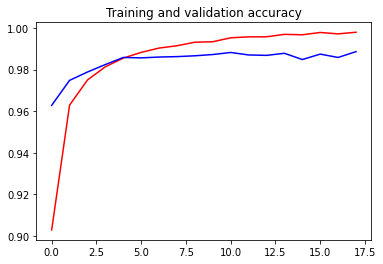

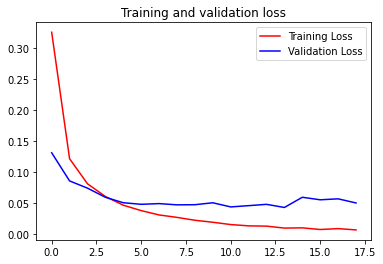

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

# Approach 2: Traditional neural network

![Neural Network Architecture](./ANN.png)

### Load data

Load the MNIST data, which comes pre-loaded with TensorFlow.

In [30]:
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


### Traditional Neural Network Architecture

In [43]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='tanh'), # Fully connected layer,
    tf.keras.layers.Dense(10, activation='softmax', input_shape = X_train[0].shape) # Output layer
])

NAME = 'ANN'

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

checkpoint = ModelCheckpoint(NAME + '.h5',  # model filename
                             monitor='val_loss', # metric to monitor
                             verbose=0,
                             save_best_only= True,
                             mode='auto')

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0,
                          patience = 4, # Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) # keeps the best weights once stopped

callbacks = [earlystop, checkpoint]

ANN_model.compile(optimizer, loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ["acc"])

start = time.time()

history = ANN_model.fit(X_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, callbacks = callbacks, validation_data=(X_validation, y_validation))

end = time.time()

ANN_model.save(NAME + '.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 1s 22us/sample - loss: 0.4943 - acc: 0.8723 - val_loss: 0.2662 - val_acc: 0.9294
Epoch 2/30
55000/55000 [==============================] - 1s 20us/sample - loss: 0.2554 - acc: 0.9278 - val_loss: 0.2114 - val_acc: 0.9414
Epoch 3/30
55000/55000 [==============================] - 1s 19us/sample - loss: 0.2090 - acc: 0.9401 - val_loss: 0.1838 - val_acc: 0.9470
Epoch 4/30
55000/55000 [==============================] - 1s 19us/sample - loss: 0.1811 - acc: 0.9484 - val_loss: 0.1708 - val_acc: 0.9534
Epoch 5/30
55000/55000 [==============================] - 1s 23us/sample - loss: 0.1604 - acc: 0.9539 - val_loss: 0.1537 - val_acc: 0.9568
Epoch 6/30
55000/55000 [==============================] - 1s 21us/sample - loss: 0.1455 - acc: 0.9594 - val_loss: 0.1441 - val_acc: 0.9606
Epoch 7/30
55000/55000 [==============================] - 1s 21us/sample - loss: 0.1335 - acc: 0.9619 - val_loss: 0.1

### Time elapsed in training process

In [44]:
print(f'Time taken to train = {end - start} seconds')

Time taken to train = 22.505767345428467 seconds


### Testing the model

In [45]:
metrics_dict = ANN_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.1313 - acc: 0.9604


### Test accuracy and loss

In [46]:
print(f'Test accuracy = {metrics_dict[1] * 100}%')
print(f'Test loss = {metrics_dict[0]}')

Test accuracy = 96.03999853134155%
Test loss = 0.13126763420552015


### Confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics

y_pred = ANN_model.predict(X_test)

confusion = confusion_matrix(y_test, np.argmax(y_pred,axis=1))

confusion

array([[ 963,    0,    0,    3,    2,    3,    6,    1,    2,    0],
       [   0, 1122,    2,    3,    0,    1,    3,    1,    3,    0],
       [   5,    0,  983,   13,    4,    2,    5,    6,   13,    1],
       [   0,    0,    4,  967,    1,    9,    1,    7,   14,    7],
       [   1,    2,    2,    3,  945,    0,    7,    1,    3,   18],
       [   3,    2,    0,   17,    3,  842,   10,    1,    8,    6],
       [  10,    3,    6,    2,    3,    9,  925,    0,    0,    0],
       [   1,    8,   11,   10,    1,    0,    1,  978,    3,   15],
       [   6,    3,    3,   11,    5,    8,    2,    8,  925,    3],
       [   6,    8,    0,   11,   12,    2,    1,   12,    3,  954]])

### Precision and Recall (ANN)

Refer the weighted average in the end for multi-class precision and recall scores

In [48]:
from sklearn.metrics import precision_score, recall_score

precision_recall = metrics.classification_report(y_test, np.argmax(y_pred, axis = 1))
print(precision_recall)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.93      0.96      0.94      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Plot the graphs

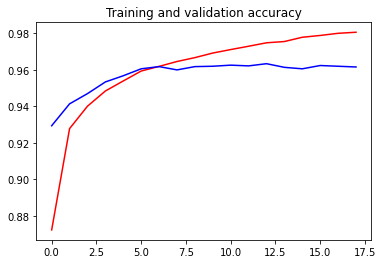

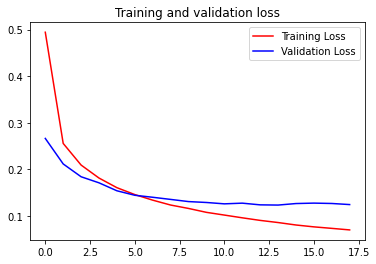

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()